In [19]:
# Imports
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## IO Code

In [7]:
probs = []
input = open("datasetalpha.csv").read().split("\n") #make CSV?
for i, row in enumerate(input):
    inputArray = row.split(",")
    #print(inputArray)
    if(i<2):
        continue
    size = len(inputArray)
    probs.append(inputArray[size-4:size-1])

In [3]:
X = []
y = []

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train,X_test,y_train,y_test)

[] [] [] []


## Iris IO

In [24]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classifier

In [14]:
# classify preliminary with SVM
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.9


## Correlation

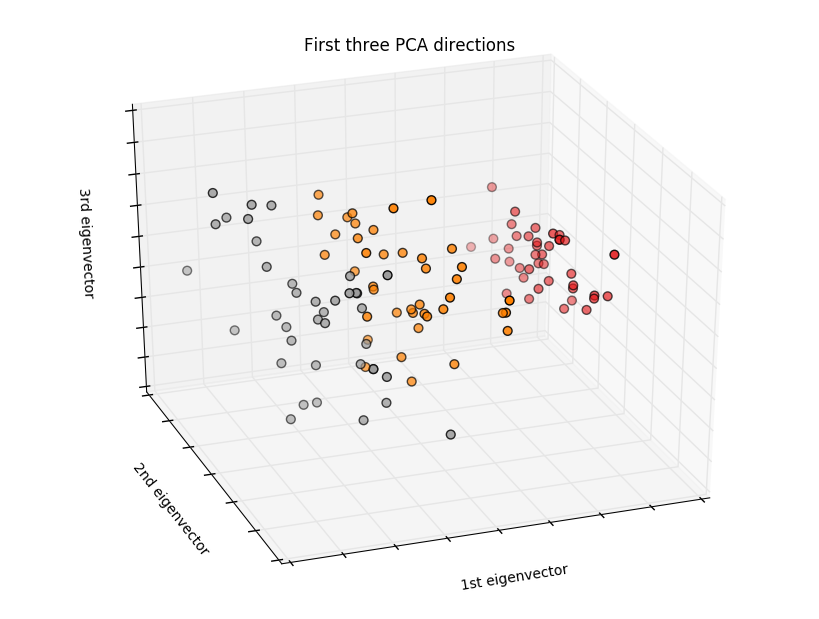

In [30]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_train)                    #This is X_train
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train,  #This is y_trian
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()